<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

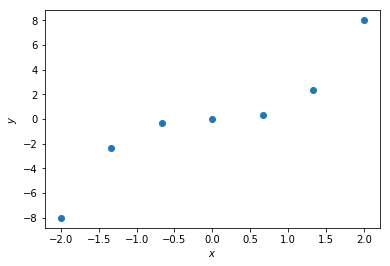

In [264]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

In [9]:
np.mean(y)

-2.5376526277146434e-16

In [13]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [49]:
X = X.reshape(1, -1)

In [52]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [25]:
y = y.reshape(-1, 1)

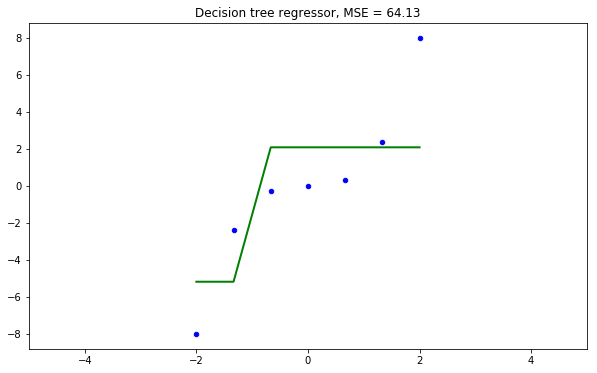

In [299]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=1, random_state=17)

reg_tree.fit(X.reshape(-1, 1), y.reshape(-1, 1))
reg_tree_pred = reg_tree.predict(X.reshape(-1, 1))

plt.figure(figsize=(10, 6))
#plt.plot(X, f(X_test), "b")
plt.scatter(X, y, c="b", s=20)
plt.plot(X, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - reg_tree_pred) ** 2))
plt.show()

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [310]:
!pip install pydot

In [311]:
!dot?

Object `dot` not found.


In [ ]:
!dot

In [309]:
export_graphviz(reg_tree, 
out_file='C:/tmp/churn_tree.dot', filled=True)
!dot -Tpng 'C:/tmp/churn_tree.dot' -o 'C:/tmp/churn_tree.dot'

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
np.mean(y[0:3])

-3.5555555555555554

In [62]:
X=X.reshape(-1,1)

In [80]:
np.arange(0.0, 5.0, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [83]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

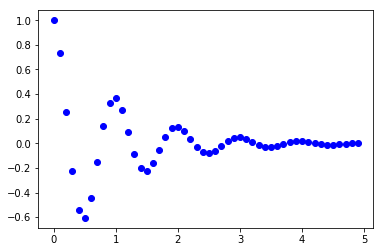

In [99]:
def ft(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)

plt.figure(1)
plt.plot(t1, ft(t1), 'bo')
plt.show()

In [105]:
type(X)

numpy.ndarray

In [138]:
np.mean(y[0], y[1], y[2])

TypeError: tuple indices must be integers or slices, not numpy.float64

In [139]:
def f(x):
  #  display(x)
   # return x+2
    if x<0:
       return np.mean(y[0:3])
    return np.mean(y[3:])

In [140]:

my_array = np.empty(7)
for i, el in enumerate((f(x) for x in X)): my_array[i] = el

In [141]:
my_array

array([-3.55555556, -3.55555556, -3.55555556,  2.66666667,  2.66666667,
        2.66666667,  2.66666667])

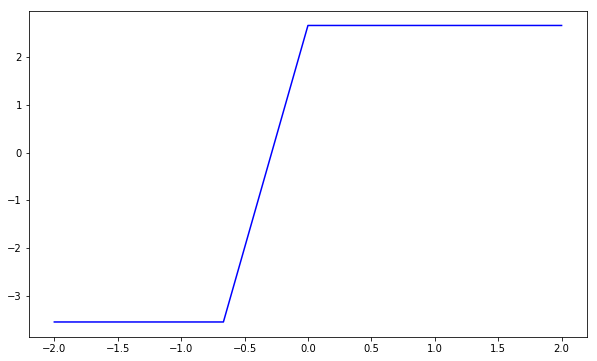

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(X, my_array, "b")
plt.show()

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [152]:
from numpy import random, mean, var, std
x1 = random.uniform(-1, 1, size=2)
xv = var(x1) 

In [153]:
x1

array([ 0.12673823, -0.52531361])

In [154]:
xv

0.10629290226357542

In [158]:
((x1[0]-1/2*(x1[0]+x1[1]))**2+(x1[1]-1/2*(x1[0]+x1[1]))**2)/2

0.10629290226357542

In [262]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [257]:
(X[X<0].shape[0])/(X.shape[0])

0.42857142857142855

In [265]:
y

array([-8.        , -2.37037037, -0.2962963 ,  0.        ,  0.2962963 ,
        2.37037037,  8.        ])

In [282]:
z = pd.DataFrame()

In [287]:
z["y"]=y

In [289]:
z[z["x"]>=0]["y"]

3    0.000000
4    0.296296
5    2.370370
6    8.000000
Name: y, dtype: float64

In [290]:
def regression_var_criterion(X, y, t):
   # print (X[X<t].shape[0])
   # return var(y)-(X[X<t].shape[0])/(X.shape[0])*var(X[X<t])-(X[X>=t].shape[0])/(X.shape[0])*var(X[X>=t])
    return var(y)-(X[X<t].shape[0])/(X.shape[0])*var(z[z["x"]<t]["y"])-(X[X>=t].shape[0])/(X.shape[0])*var(z[z["x"]>=t]["y"])

In [295]:
t1 = np.arange(-1.9,1.9, 0.1)

In [201]:
y

array([-8.        , -2.37037037, -0.2962963 ,  0.        ,  0.2962963 ,
        2.37037037,  8.        ])

In [296]:
my_array = np.empty(38)
for i, el in enumerate((regression_var_criterion(X,y,t) for t in t1)): my_array[i] = el

In [297]:
my_array

array([ 10.66666667,  10.66666667,  10.66666667,  10.66666667,
        10.66666667,  10.66666667,  10.75445816,  10.75445816,
        10.75445816,  10.75445816,  10.75445816,  10.75445816,
        10.75445816,   9.48148148,   9.48148148,   9.48148148,
         9.48148148,   9.48148148,   9.48148148,   9.48148148,
         9.48148148,   9.48148148,   9.48148148,   9.48148148,
         9.48148148,   9.48148148,  10.75445816,  10.75445816,
        10.75445816,  10.75445816,  10.75445816,  10.75445816,
        10.75445816,  10.66666667,  10.66666667,  10.66666667,
        10.66666667,  10.66666667])

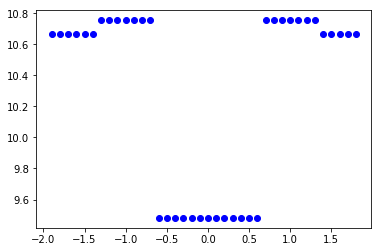

In [298]:
plt.figure(1)
plt.plot(t1, my_array, 'bo')
plt.show()

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [211]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [213]:
def f2(x):
    if x<0:
        if x < -1.5:
            return np.mean(y[0])
        return np.mean(y[1:3])
    if x<1.5:
        return np.mean(y[3:5])
    return np.mean(y[5:])

In [219]:
x1 = np.arange(-2.0,2.0, 0.01)
my_array = np.empty(400)
for i, el in enumerate((f2(x) for x in x1)): my_array[i] = el

In [218]:
x1.shape

(400,)

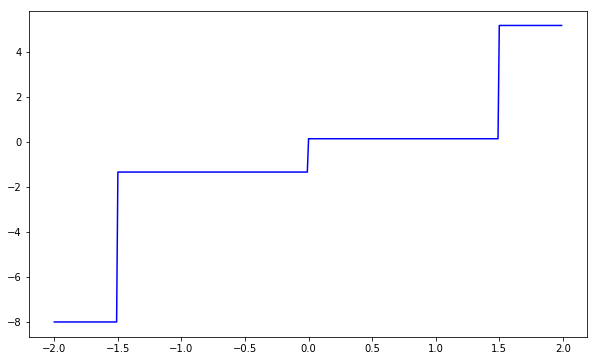

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(x1, my_array, "b")
plt.show()

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [329]:
df = pd.read_csv('C:/Users/AgileDeveloper/data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [253]:
df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [330]:
df["age_years"]=df["age"]//365

In [333]:
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])

In [280]:
type(df)

pandas.core.frame.DataFrame

In [334]:
y = df["cardio"]

In [336]:
df.drop(["cardio", "age"],axis=1,inplace=True)

In [353]:
y.head()

id
0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [339]:
df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

array([[   2.,  168.,   62., ...,    1.,    0.,    0.],
       [   1.,  156.,   85., ...,    1.,    0.,    0.],
       [   1.,  165.,   64., ...,    1.,    0.,    0.],
       ..., 
       [   2.,  183.,  105., ...,    1.,    0.,    0.],
       [   1.,  163.,   72., ...,    0.,    1.,    0.],
       [   1.,  170.,   72., ...,    1.,    0.,    0.]])

In [369]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3,random_state=17)

In [370]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
30908,2,169,76.0,160,80,0,0,1,49,1,0,0,1,0,0
86475,2,158,68.0,140,90,1,0,1,47,1,0,0,1,0,0
77291,1,165,70.0,120,80,0,0,1,62,1,0,0,0,1,0
63162,1,140,70.0,140,90,0,0,0,45,1,0,0,1,0,0
43647,2,172,101.0,120,80,0,0,0,48,1,0,0,1,0,0


Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [371]:
reg_tree_с = DecisionTreeClassifier(max_depth=3, random_state=17)

reg_tree_с.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [372]:
export_graphviz(reg_tree_с,  feature_names=X_train.columns,
out_file='C:/tmp/cardio_tree.dot', filled=True)

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [373]:
c_predict= reg_tree_с.predict(X_valid)

In [374]:
c_predict

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [375]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, c_predict)

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [412]:
acc1=accuracy_score(y_valid, c_predict)

In [376]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(reg_tree_с, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [377]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   58.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [379]:
tree_grid.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71551, std: 0.00363, params: {'max_depth': 2},
 mean: 0.72771, std: 0.00485, params: {'max_depth': 3},
 mean: 0.73069, std: 0.00443, params: {'max_depth': 4},
 mean: 0.73106, std: 0.00479, params: {'max_depth': 5},
 mean: 0.73214, std: 0.00502, params: {'max_depth': 6},
 mean: 0.72990, std: 0.00275, params: {'max_depth': 7},
 mean: 0.72994, std: 0.00511, params: {'max_depth': 8},
 mean: 0.72800, std: 0.00415, params: {'max_depth': 9},
 mean: 0.72539, std: 0.00348, params: {'max_depth': 10}]

In [406]:
rows = list()
for grid_score in tree_grid.grid_scores_:
  #  for fold, score in enumerate(grid_score.cv_validation_scores):
        row = grid_score.parameters.copy()
        row['mean'] = grid_score.mean_validation_score
     #   row['score'] = score
        rows.append(row)
gr = pd.DataFrame(rows)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [407]:
gr

,max_depth,mean
0,2,0.715510
1,3,0.727714
2,4,0.730694
3,5,0.731061
4,6,0.732143
5,7,0.729898
6,8,0.729939
7,9,0.728000
8,10,0.725388


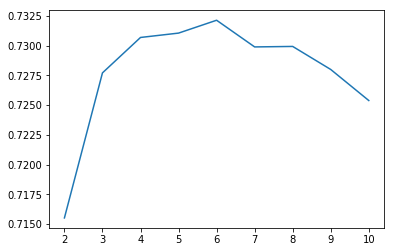

In [408]:
plt.plot(gr["max_depth"], gr["mean"])

In [409]:
tree_grid.best_params_

{'max_depth': 6}

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [415]:
best_predict= tree_grid.predict(X_valid)
acc2 = accuracy_score(y_valid, best_predict)

In [416]:
acc1

0.72128571428571431

In [418]:
(acc2 - acc1) / acc1 * 100

0.63378886908298504

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- да, нет
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [454]:
df.head()# Ваш код здесь

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,...,gluc_2,gluc_3,age45_50,age50_55,age55_60,age60_65,ap_hi120_140,ap_hi140_160,ap_hi160_180,male
id,,,,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,...,0,0,0,1,0,0,0,0,0,1
1,1,156,85.0,140,90,0,0,1,55,0,...,0,0,0,0,1,0,0,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,...,0,0,0,1,0,0,1,0,0,0
3,2,169,82.0,150,100,0,0,1,48,1,...,0,0,1,0,0,0,0,1,0,1
4,1,156,56.0,100,60,0,0,0,47,1,...,0,0,1,0,0,0,0,0,0,0


In [431]:
df["age45_50"]=(df["age_years"]>=45) & (df["age_years"]<50)

In [434]:
df["age50_55"]=(df["age_years"]>=50) & (df["age_years"]<55)

In [436]:
df["age55_60"]=(df["age_years"]>=55) & (df["age_years"]<60)

In [439]:
df["age60_65"]=(df["age_years"]>=60) & (df["age_years"]<65)

In [440]:
df["ap_hi120_140"]=(df["ap_hi"]>=120) & (df["ap_hi"]<140)

In [441]:
df["ap_hi140_160"]=(df["ap_hi"]>=140) & (df["ap_hi"]<160)

In [442]:
df["ap_hi160_180"]=(df["ap_hi"]>=160) & (df["ap_hi"]<180)

In [444]:
df["male"]=df["gender"]-1

In [453]:
df['ap_hi140_160'] = df['ap_hi140_160'].astype('int')

In [459]:
newdf=df.drop(["gender","height","weight", "ap_hi","ap_lo","alco","active","age_years","gluc_1","gluc_2","gluc_3"],axis=1)

In [463]:
y.head()

id
0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [465]:
newtree = DecisionTreeClassifier(max_depth=3, random_state=17)

newtree.fit(newdf, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [466]:
export_graphviz(newtree,  feature_names=newdf.columns,
out_file='C:/tmp/cardio_tree2.dot', filled=True)

In [468]:
q = newtree.predict(newdf)
acc2 = accuracy_score(y, q)

In [469]:
acc2

0.70540000000000003